# Lab 1

### Objectives

1. Understand and code a simple neuron
2. Understand how a neuron learns
3. Understand its limitations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Setting a random initial weights and bias.

In [2]:
W = np.random.randn(1, 2)
B = np.random.randn(1)

print("Weights: ", W)
print("Bias: ", B)

Weights:  [[-1.23103507 -1.89189612]]
Bias:  [0.68579914]


This is our activation function. We are using a sigmoid function. You can choose the function (e.g. could be a step function, tanh etc). Source: https://towardsdatascience.com/statistics-is-freaking-hard-wtf-is-activation-function-df8342cdf292

This takes in the inputs (X), weights (W) and bias (B). For an input, X, of length _n_ the output is size _(n, n)_.

In [3]:
def sigm(X, W, B):
    M = 1/(1+np.exp(-(X.dot(W.T)+B)))
    return M

### Derivation of functions

Derive an analytical expressionn for the error function. In this lab, the squared error function is used as the error function.

This is used to make use of gradient descent in order to update the weights.

In [4]:
# insert image of derivation here

### Putting this into code
Uptating rules for weights and bias.

In [5]:
def diff_W(X, Z, Y, B, W):

    dS = sigm(X, W, B)*(1-sigm(X, W, B)) # differentiating sigm function
    dW = (Y-Z)*dS

    return X.T.dot(dW) # dot product between X transpose and dW

def diff_B(X, Z, Y, B, W):

    dS = sigm(X, W, B)*(1-sigm(X, W, B))
    dB = (Y-Z)*dS

    return dB.sum(axis=0)


Creating 15 two-dimensional samples as input e.g., [0, 1]. We apply the bitwise OR operator (|) to find the outputs and split into training and testing.

In [40]:
X = np.random.randint(2, size=[15, 2])
Y = np.array(X[:,0] | X[:,1] ).T

X_Test = np.random.randint(2, size=[15, 2])
Y_Test = np.array(X[:,0] | X[:,1] ).T

### Teaching the neuron to emulate the OR function.

NB: There was an error when += was used. While the arrays are broadcastable, numpy does not like trying to assign the larger array to the shape of the smaller array.

Broadcasting = When a smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations.

Sources:
- https://numpy.org/doc/stable/user/basics.broadcasting.html
- https://stackoverflow.com/questions/47493559/valueerror-non-broadcastable-output-operand-with-shape-3-1-doesnt-match-the 

Note each epoch of the variable 'error' is a (15, 15) array. This is because 'output' is a (15, 15) array.

Text(0.5, 1.0, 'Error vs epoch')

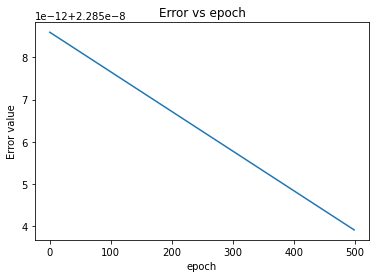

In [50]:
learning_rate = 0.1

x_plot = []
y_plot = []

for epoch in range(500):
    output = sigm(X, W, B)
    # diff_W size = (2, 15) ( .T = (15, 2) )
    # diff_B size = (15,)
    # W size = (1, 2)
    # output size = (15, 15) --> WHY IS THE OUTPUT THIS SIZE
    # Y size = (15,)

    W = W + (learning_rate * diff_W(X, output, Y, B, W).T)
    B = B + learning_rate * diff_B(X, output, Y, B, W)

    error = (Y - output)**2
    
    x_plot.append(epoch)
    y_plot.append(error[-1, -1]) # plotting the final error value for the final output

plt.plot(x_plot, y_plot)
plt.xlabel("epoch")
plt.ylabel("Error value")
plt.title("Error vs epoch")

**How W changes with each iteration** </br>
The closer epoch gets to 500, the smaller W is.

**How the error changes with each iteration** </br>
The closer epoch gets to 500, the smaller the error is. This reduces linearly which can be seen in the graph:
- The plot shows no oscillations which suggests that the learning rate is not too large. When the learning rate was set to 100, the graph looked like the positive quadrant of a 1/x graph.
- The gradient can give us the learning rate.

**Increasing the number of iterations** </br>
The number of iterations was set to 1000, then 2000, then 40000 and finally 8000. In each case, the final error value got smaller, however, it never reached zero. When epoch = 8000, the final error value was 0.00011786992787626743. 

**Does the error go to zero? Why not? What could we do to make it exactly zero?**
For the error to go to zero, the output of the neuron must equal the correct output exactly. 

Whilst increasing the learning rate reduces the error, it will never reach zero. This is because we can't approximate the function exactly, it can never be an exact step function between 0 and 1.

Source: https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/ 

**Error vs epoch graph**
My plot shows a low learning rate.

For reference: </br>
![error vs epoch](epoch_learningrate.png)</br>
Source: https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10

**ALTERNATIVE METHODS TO FIND THE LEARNING RATE**
*Triangular method*
This method involves restarting the learning rate to the first value after so many iterations.


Text(0, 0.5, 'Error value')

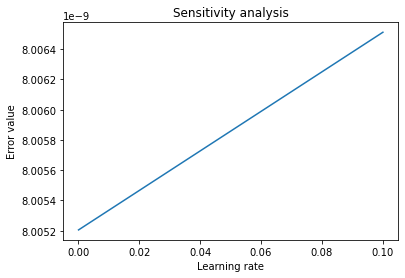

In [109]:
# changing the learning rate

lrates = [0.1, 10e-3, 10e-4 , 10e-5] # this shows linear, increasing line
#lrates = [10e-10, 10e-20, 10e-30] # this shows a flat line

y_plot = []

for i in lrates:

    for epoch in range(10000):
        output = sigm(X, W, B)

        W = W + (i * diff_W(X, output, Y, B, W).T)
        B = B + i * diff_B(X, output, Y, B, W)

        error = (Y - output)**2
        
    y_plot.append(error[-1, -1]) # plotting the final error value for the final output

plt.figure(2)
plt.plot(lrates, y_plot)
#plt.axes([0, 10e-30, 8, 8.1])
plt.title("Sensitivity analysis")
plt.xlabel("Learning rate")
plt.ylabel("Error value")

**Error vs learning rate graph**
By reducing the learning rate to 10e-10, we reach a constant error shown by the flat line. This is most likely because the learning rate is so low that it never converges? Ideally, the error vs learning rate graph should look as follows:

![error vs epoch](loss_learningrate.png)</br>
Source: https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10 </br>

The number of epochs has been increased to account for the reduction in learning rate.

In [1]:
# To look into next time: https://pytorch-lightning.readthedocs.io/en/stable/advanced/lr_finder.html
# Using inbuilt tools in PyTorch to find the learning rate
# import torch

False

### Repeating for the AND operator (=&).

In [41]:
X = np.random.randint(2, size=[15, 2])
Y = np.array(X[:,0] & X[:,1] ).T

X_Test = np.random.randint(2, size=[15, 2])
Y_Test = np.array(X[:,0] & X[:,1] ).T

learning_rate = 0.01

for epoch in range(500):
    output = sigm(X, W, B)

    W = W + (learning_rate * diff_W(X, output, Y, B, W).T)
    B = B + (learning_rate * diff_B(X, output, Y, B, W))
    
    # looking at the first output and error at each iteration
    error = (Y - output)**2
    #print("W: ", W[1, 1])
    #print("Error: ", error[1, 1])

**General comments**
The results from logical AND is very similar to logical OR.

### Repeating for the XOR operator (=^).

In [42]:
X = np.random.randint(2, size=[15, 2])
Y = np.array(X[:,0] ^ X[:,1] ).T

X_Test = np.random.randint(2, size=[15, 2])
Y_Test = np.array(X[:,0] ^ X[:,1] ).T

learning_rate = 100

for epoch in range(500):
    output = sigm(X, W, B)

    W += learning_rate * diff_W(X, output, Y, B, W).T
    B += learning_rate * diff_B(X, output, Y, B, W)

    # looking at the first output and error at each iteration
    error = (Y - output)**2
    #print("W: ", W[1, 1])
    #print("Error: ", error[1, 1])

**Are we able to reproduce the XOR? Can you explain these results?**</br>
The learning rate has to be very high (10s of order of magnitude) to achieve similar results to the logical AND/ OR. </br></br>

The outputs of AND and OR gates are easily separable using a single line. A XOR gate needs two lines which can be achieved with a second layer of neuron/s.</br></br>

![Two lines for XOR](XOR.gif)

Source: https://www.quora.com/Why-cant-we-make-an-XOR-gate-with-1-neuron </br></br>

It is possible to make an artificial neural network for XOR, although results can be unreliable. See how: https://www.quora.com/How-do-I-code-XOR-gate-in-artificial-neural-network#:~:text=NOTE%3A%20If%20you%20are%20using,be%20quite%20tricky%20and%20unreliable. </br></br>


**If you really wanted to solve the XOR just using one neuron, can you think of any solutions that we could apply?**</br>
Have a high learning rate... ?(check this)